In [1]:
_random_seed_ = 42

In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [63]:
expression_minmax_df = pd.read_csv('../data/processed/expression_tpm_minmax.tsv', sep='\t', index_col=0)

In [64]:
expression_minmax_df = expression_minmax_df.set_index('pog_id')

In [65]:
drugs_df = pd.read_csv('../data/processed/drugs_filtered.tsv', sep='\t', index_col=0)

In [66]:
drugs_selected_df = drugs_df[['pog_id', 'drug_name', 'days_on_tx_since_biopsy', 'cancer_cohort']]

# Prepare features and labels

## Join drugs and expression tables

In [67]:
drugs_expression_df = drugs_selected_df.join(expression_minmax_df, on='pog_id', how='inner')

In [68]:
drugs_expression_df = drugs_expression_df.drop_duplicates()

Number of drug types and their names

## Select cancer type and drug
decide based on notebook 0

In [69]:
cancer_types = np.unique(drugs_expression_df['cancer_cohort'])

In [70]:
drug_names = np.unique(drugs_expression_df['drug_name'])

In [143]:
# drugs_expression_sel_df = drugs_expression_df[(drugs_expression_df['cancer_cohort'] == 'BRCA') & (drugs_expression_df['drug_name'] == 'CISPLATIN')]
drugs_expression_sel_df = drugs_expression_df[(drugs_expression_df['drug_name'] == 'FLUOROURACIL')]

In [144]:
drugs_expression_sel_df.shape

(95, 58054)

In [145]:
len(np.unique(drugs_expression_sel_df['pog_id']))

73

## Set features (X) and labels (y)

In [146]:
X = drugs_expression_sel_df.loc[:, expression_minmax_df.columns]

In [147]:
y = drugs_expression_sel_df.loc[:, 'days_on_tx_since_biopsy']

## Power transform on y

In [148]:
from sklearn.preprocessing import PowerTransformer

In [149]:
power_transformer = PowerTransformer(method='box-cox', standardize=True)

In [150]:
y_trans = power_transformer.fit_transform(y.values.reshape(-1, 1))[:, 0]

## Classification

In [151]:
y_classes = y_trans > 0

In [152]:
len(y_classes)

95

## Train test split

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
# X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y_trans, test_size=0.25, random_state=_random_seed_)
X_train, X_test, y_train, y_test = train_test_split(X, y_classes, test_size=0.25, random_state=_random_seed_)

## Machine learning

In [155]:
from sklearn.svm import LinearSVC

In [156]:
lin_svm = LinearSVC(max_iter=10000)

In [157]:
lin_svm.fit(X_train, y_train)

/home/eerhan/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [158]:
y_pred = lin_svm.predict(X_test)

In [159]:
y_true = y_test

## Classification report

In [160]:
from sklearn.metrics import classification_report

In [161]:
print(classification_report(y_pred=y_pred, y_true=y_true))

              precision    recall  f1-score   support

       False       0.56      0.42      0.48        12
        True       0.53      0.67      0.59        12

   micro avg       0.54      0.54      0.54        24
   macro avg       0.54      0.54      0.53        24
weighted avg       0.54      0.54      0.53        24



In [162]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [163]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion matrix, without normalization
[[5 7]
 [4 8]]


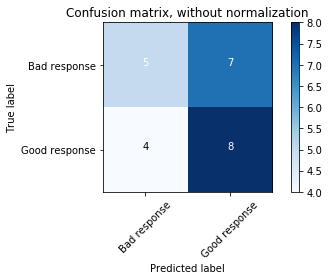

In [164]:
class_names = ['Bad response', 'Good response']
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [203]:
X.join(pd.DataFrame({'y': y, 'y_trans': y_trans}))

,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699,y,y_trans
1024,0.038011,0.200942,0.073997,0.056458,0.016708,0.007172,0.217258,0.054685,0.192475,0.092490,...,0.0,0.0,0.0,0.0,0.105664,0.000000,0.000000,0.0,36,-0.951074
1152,0.038011,0.200942,0.073997,0.056458,0.016708,0.007172,0.217258,0.054685,0.192475,0.092490,...,0.0,0.0,0.0,0.0,0.105664,0.000000,0.000000,0.0,496,1.456447
2634,0.000340,0.186761,0.103142,0.062292,0.016560,0.380245,0.120612,0.046114,0.104932,0.211617,...,0.0,0.0,0.0,0.0,0.013072,0.000000,0.000000,0.0,14,-1.668898
1796,0.000000,0.145788,0.063967,0.049375,0.028740,0.014958,0.254616,0.026394,0.096687,0.177580,...,0.0,0.0,0.0,0.0,0.059913,0.000000,0.000000,0.0,75,-0.342331
3093,0.017499,0.274307,0.121688,0.067500,0.010437,0.039369,0.207766,0.053421,0.299505,0.113208,...,0.0,0.0,0.0,0.0,0.067538,0.054054,0.000000,0.0,867,2.059674
982,0.000097,0.158503,0.113929,0.050625,0.014115,0.463331,0.139118,0.045988,0.148553,0.073992,...,0.0,0.0,0.0,0.0,0.063181,0.000000,0.000000,0.0,704,1.830604
1747,0.000243,0.325275,0.130583,0.133542,0.009077,0.010575,0.130277,0.142236,0.279568,0.129486,...,0.0,0.0,0.0,0.0,0.061002,0.081081,0.000000,0.0,532,1.530219
1795,0.000243,0.325275,0.130583,0.133542,0.009077,0.010575,0.130277,0.142236,0.279568,0.129486,...,0.0,0.0,0.0,0.0,0.061002,0.081081,0.000000,0.0,70,-0.401556
62,0.000486,0.096389,0.130961,0.114375,0.087135,0.011449,0.131707,0.040375,0.240744,0.137625,...,0.0,0.0,0.0,0.0,0.089325,0.027027,0.000000,0.0,316,0.994454
1343,0.000583,0.161957,0.110901,0.100625,0.015412,0.201879,0.250108,0.053547,0.287363,0.139845,...,0.0,0.0,0.0,0.0,0.052288,0.000000,0.000000,0.0,108,-0.022138


In [166]:
y_true

array([False,  True,  True, False, False,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True, False, False,
        True,  True, False,  True, False, False])